In [43]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import deque
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("G:\daneshga\darsi\AI\DecisionTree 2\data.csv")

In [3]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.drop(['Id', 'pdays'], axis= 1, inplace=True)

In [6]:
df[(df['age'] > 100) | (df['age'] <= 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,0,unknown,no
45203,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,0,unknown,yes
45204,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,8,failure,yes
45205,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,0,unknown,yes


In [7]:
df.drop(df[(df['age'] > 100) | (df['age'] <= 0)].index, inplace=True)

In [8]:
df['poutcome'].value_counts()

poutcome
unknown    36956
failure     4900
other       1840
success     1511
Name: count, dtype: int64

In [9]:
df.drop('poutcome', axis=1, inplace=True)

In [10]:
df.isnull().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
y            0
dtype: int64

In [11]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.drop(df[df['balance'].isnull()].index, inplace=True)

In [12]:
df['contact'].value_counts()

contact
cellular     29282
unknown      13016
telephone     2906
Name: count, dtype: int64

In [13]:
df.drop('contact', axis = 1, inplace=True)

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y
1,44.0,technician,single,secondary,no,29.0,yes,no,5,may,151,1,0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,may,76,1,0,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,5,may,92,1,0,no
4,33.0,unknown,single,unknown,no,1.0,no,no,5,may,198,1,0,no
5,35.0,management,married,tertiary,no,231.0,yes,no,5,may,139,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,17,nov,977,3,0,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,17,nov,456,2,0,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,17,nov,1127,5,3,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,17,nov,508,4,0,no


In [15]:
df['job'].value_counts()

job
blue-collar      9732
management       9457
technician       7595
admin.           5171
services         4154
retired          2262
self-employed    1579
entrepreneur     1486
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: count, dtype: int64

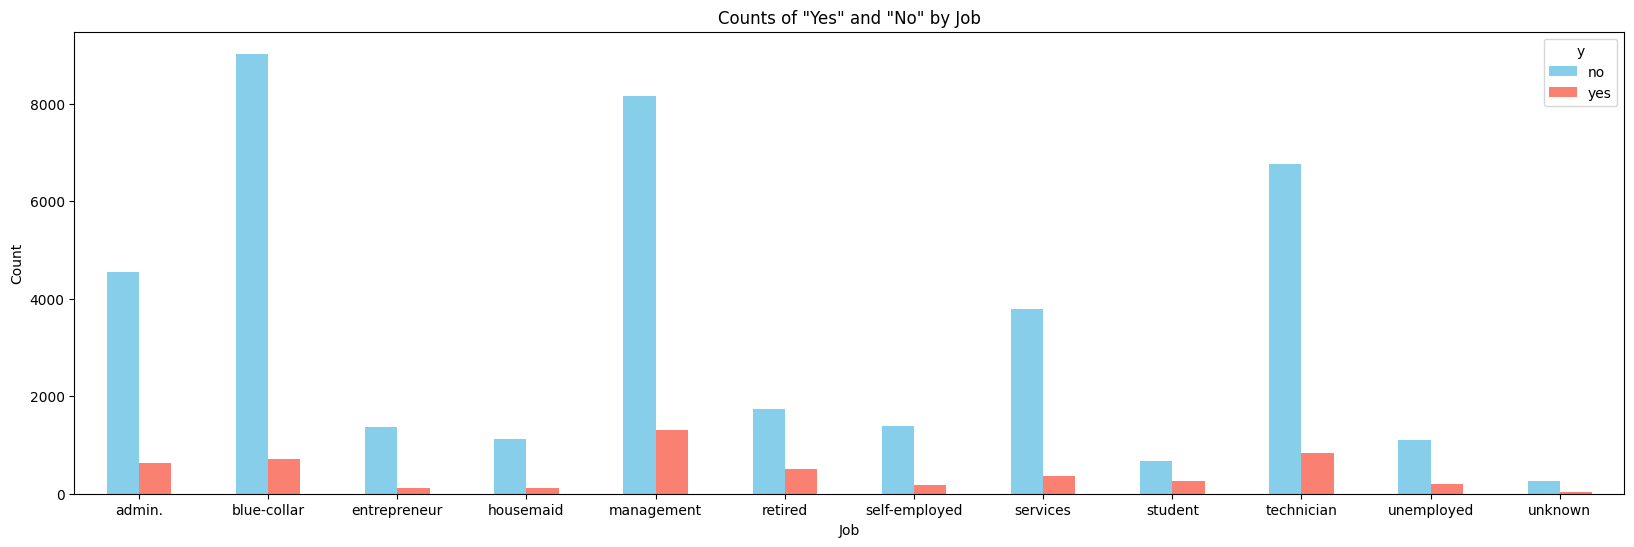

In [16]:
counts = df.groupby(['job', 'y']).size().unstack(fill_value=0)
counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(20, 6))
plt.title('Counts of "Yes" and "No" by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='y', loc='upper right')
plt.show()

In [17]:
df['job'].replace('admin.', 'admin', inplace=True)
df['job'].replace('management', 'admin', inplace=True)
df['job'].replace('entrepreneur', 'admin', inplace=True)

df['job'].replace('student', 'unemployed', inplace=True)
df['job'].replace('unknown', 'unemployed', inplace=True)

df['job'].replace('housemaid', 'services', inplace=True)
df['job'].replace('blue-collar', 'services', inplace=True)

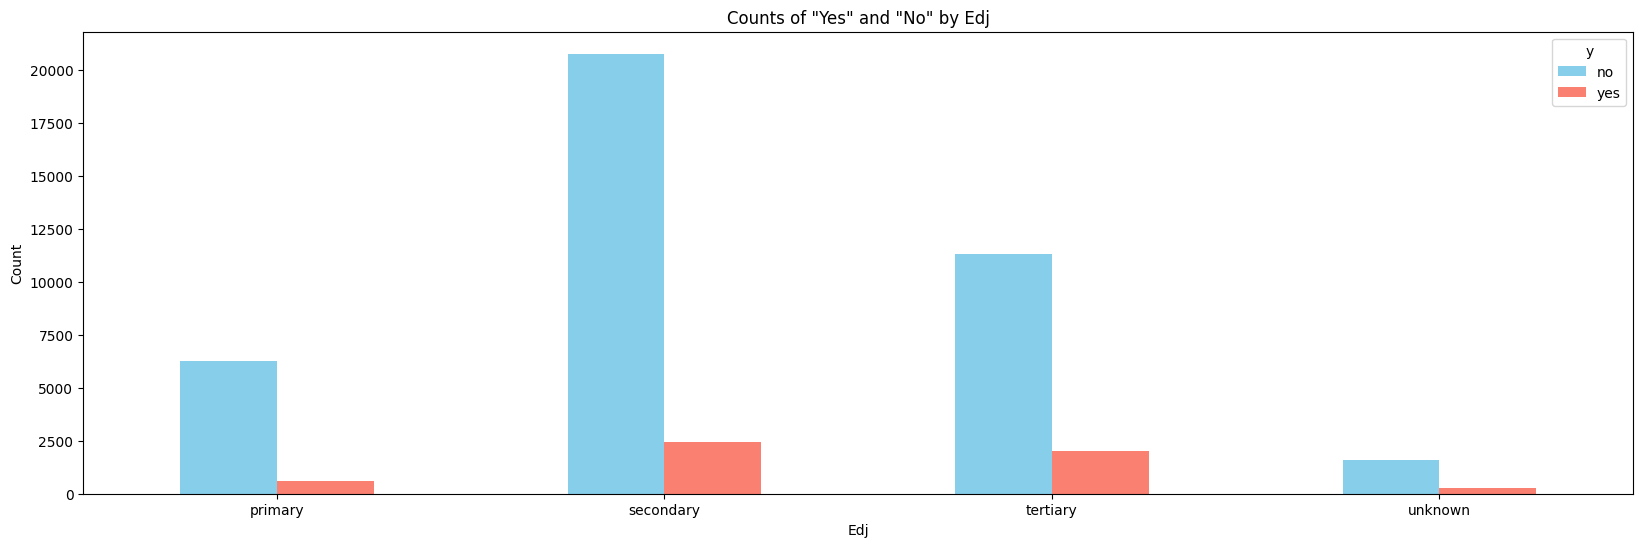

In [18]:
counts = df.groupby(['education', 'y']).size().unstack(fill_value=0)
counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(20, 6))
plt.title('Counts of "Yes" and "No" by Edj')
plt.xlabel('Edj')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='y', loc='upper right')
plt.show()

In [19]:
df['default'].value_counts()

default
no     44390
yes      814
Name: count, dtype: int64

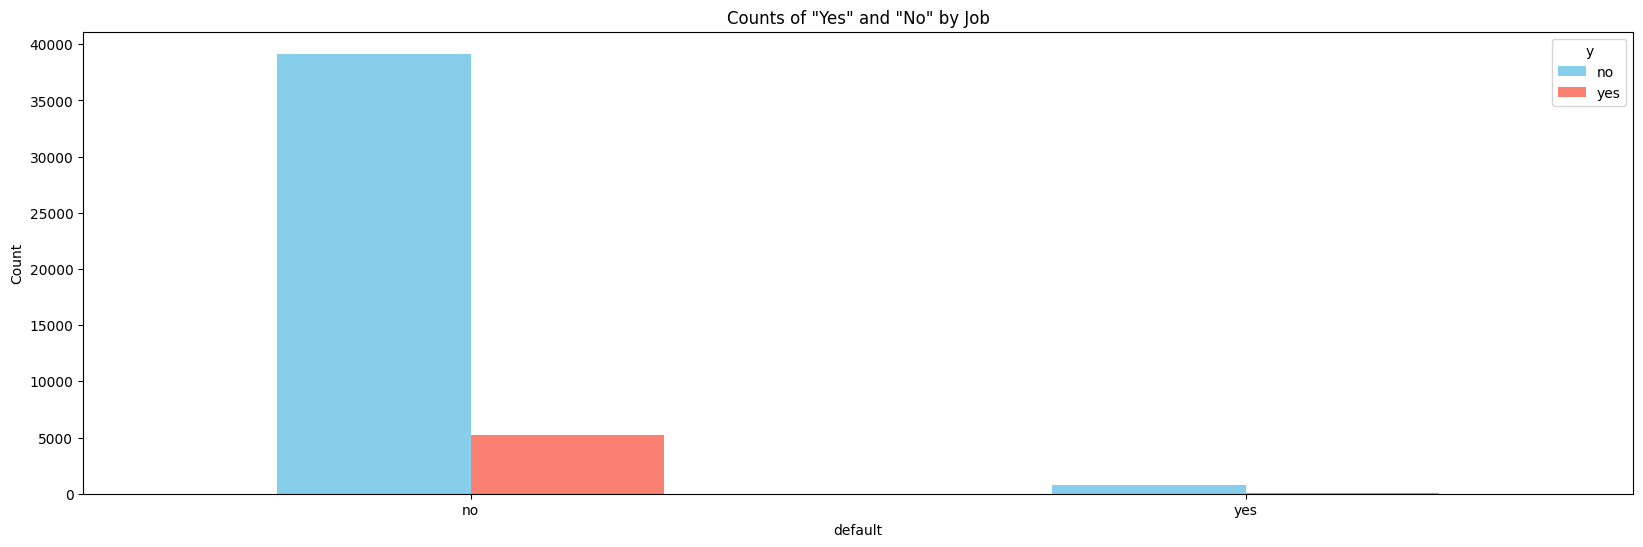

In [20]:
counts = df.groupby(['default', 'y']).size().unstack(fill_value=0)
counts.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(20, 6))
plt.title('Counts of "Yes" and "No" by Job')
plt.xlabel('default')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='y', loc='upper right')
plt.show()

In [21]:
df.drop('default', inplace=True, axis = 1)

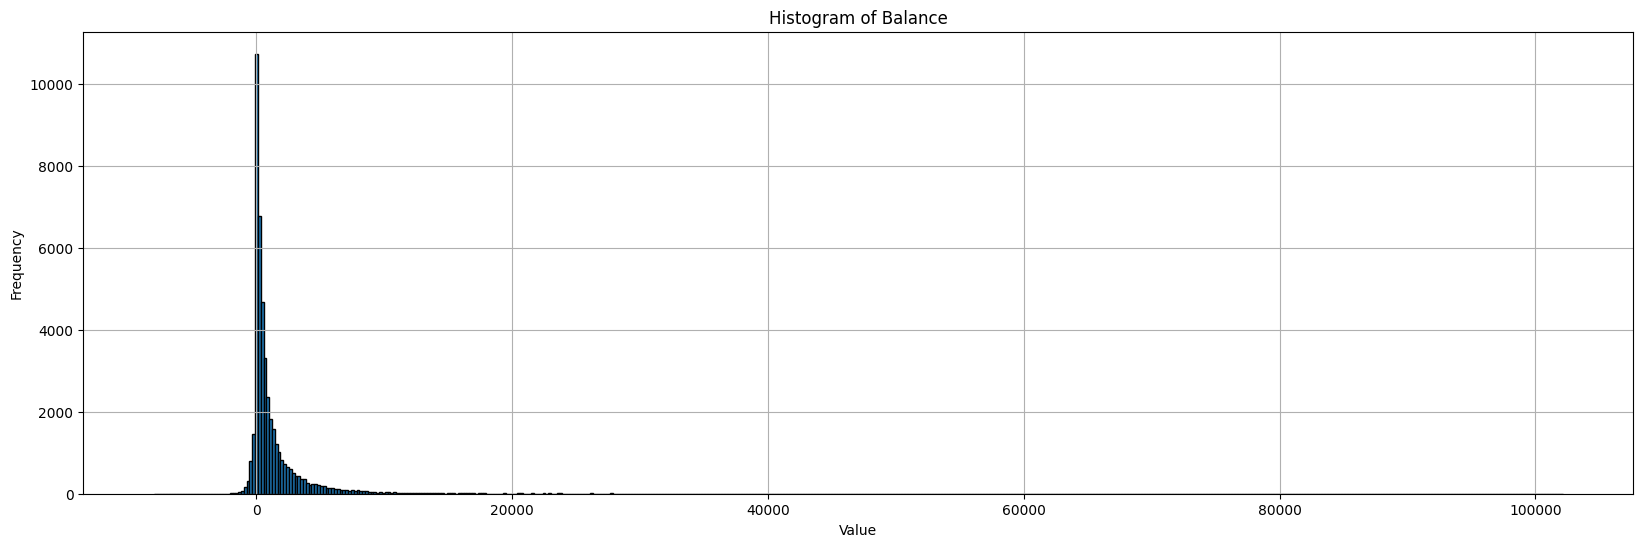

In [22]:
plt.figure(figsize=(20, 6))
df['balance'].plot(kind='hist', bins=500, edgecolor='black')
plt.title('Histogram of Balance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
df['balance'].describe()

count     45204.000000
mean       1362.343045
std        3044.968509
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [24]:
bins = [-10000, 1360, 110000]
labels = ['underMean', 'aboveMean']
df['balance'] = pd.cut(df['balance'], bins=bins, labels=labels)


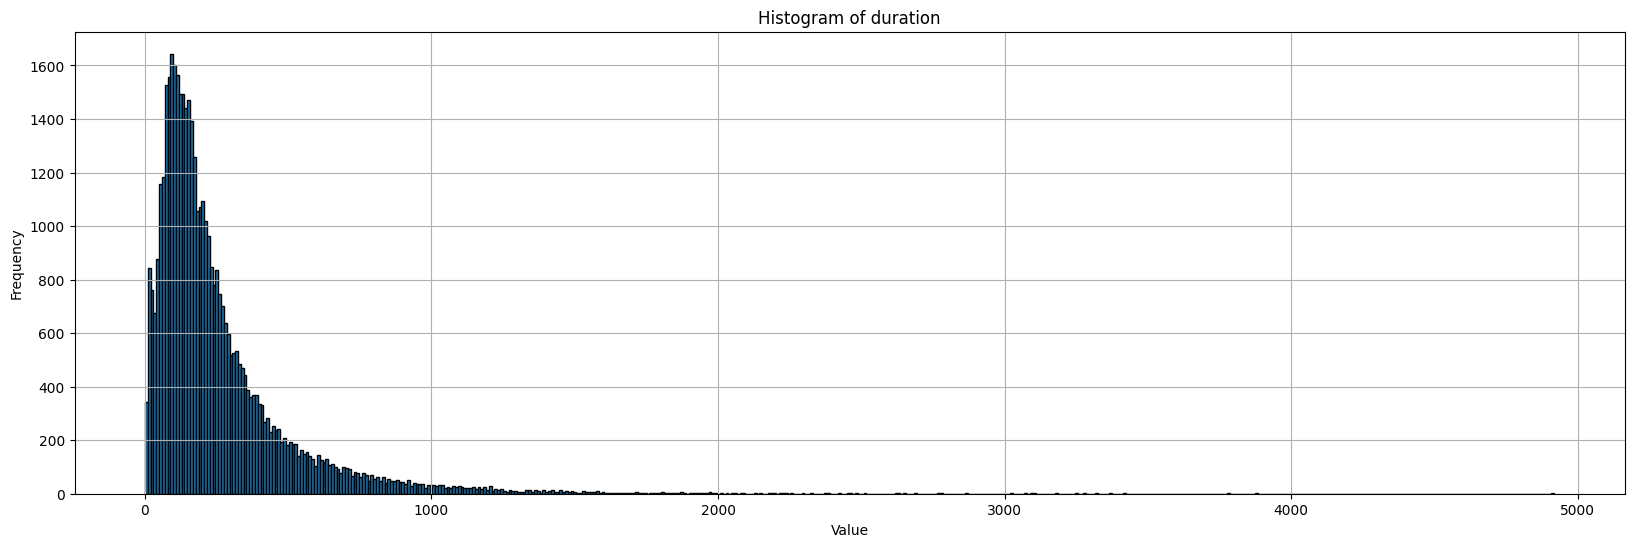

In [25]:
plt.figure(figsize=(20, 6))
df['duration'].plot(kind='hist', bins=500, edgecolor='black')
plt.title('Histogram of duration')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
df['duration'].describe()

count    45204.000000
mean       258.165494
std        257.542700
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [27]:
bins = [0, 350, 700, 5000]
labels = ['one', 'two', 'three']
df['duration'] = pd.cut(df['duration'], bins=bins, labels=labels)

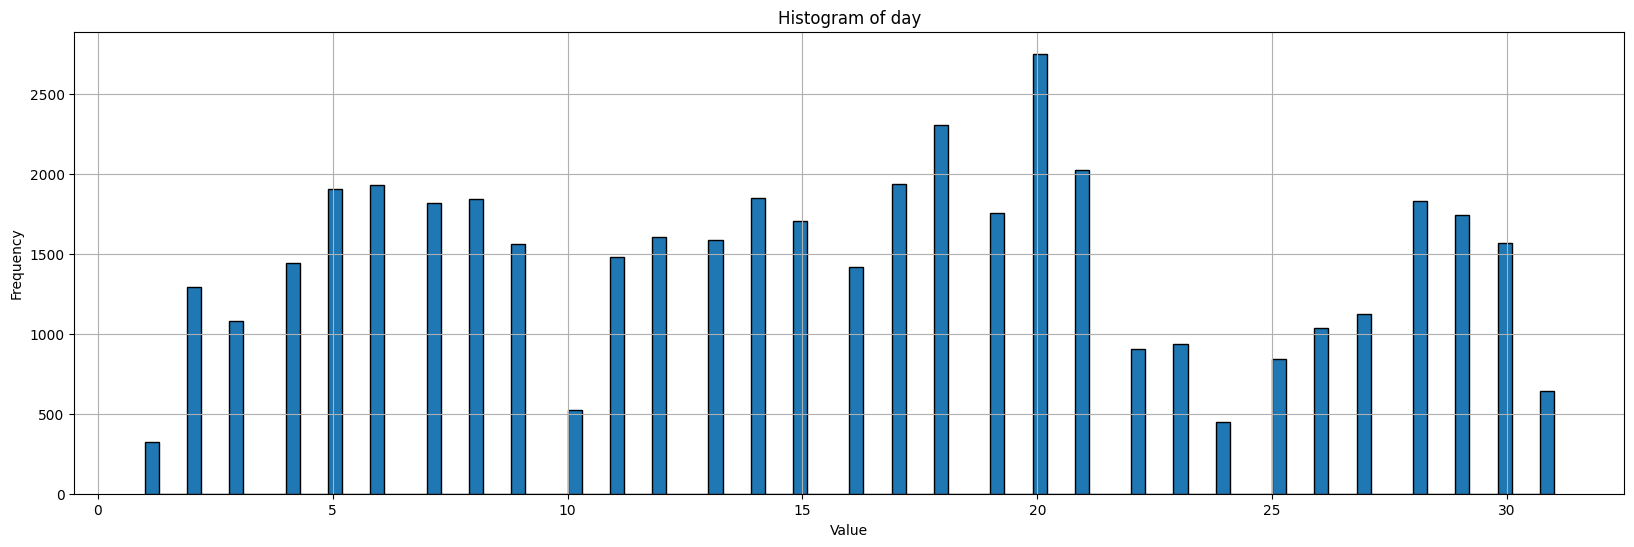

In [28]:
plt.figure(figsize=(20, 6))
df['day'].plot(kind='hist', bins=100, edgecolor='black')
plt.title('Histogram of day')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
bins = [0, 17, 35]
labels = ['low', 'high']
df['day'] = pd.cut(df['day'], bins=bins, labels=labels)

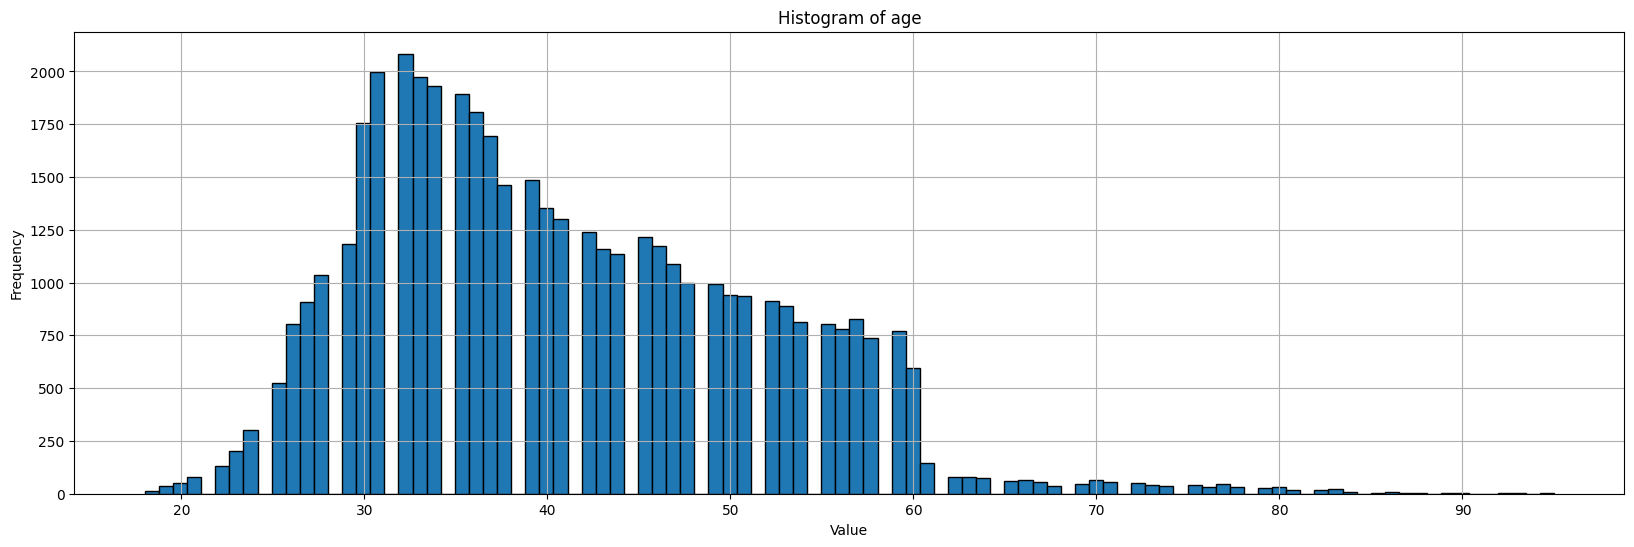

In [30]:
plt.figure(figsize=(20, 6))
df['age'].plot(kind='hist', bins=100, edgecolor='black')
plt.title('Histogram of age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
bins = [0, 30, 45, 100]
labels = ['<30', '[30,45]', '45<']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)

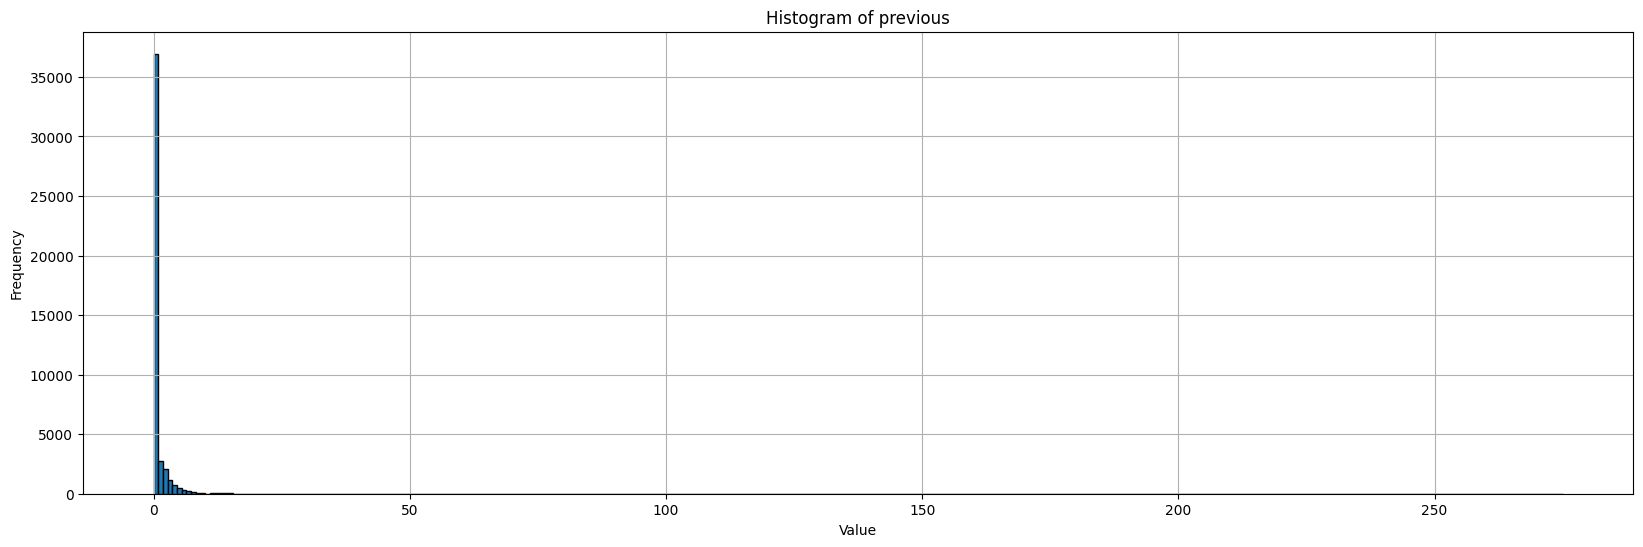

In [32]:
plt.figure(figsize=(20, 6))
df['previous'].plot(kind='hist', bins=300, edgecolor='black')
plt.title('Histogram of previous')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
df.loc[df['previous'] > 0, 'previous'] = 1

In [40]:
df

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,y
1,"[30,45]",technician,single,secondary,underMean,yes,no,low,may,one,1,0,no
2,"[30,45]",admin,married,secondary,underMean,yes,yes,low,may,one,1,0,no
3,45<,services,married,unknown,aboveMean,yes,no,low,may,one,1,0,no
4,"[30,45]",unemployed,single,unknown,underMean,no,no,low,may,one,1,0,no
5,"[30,45]",admin,married,tertiary,underMean,yes,no,low,may,one,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45<,technician,married,tertiary,underMean,no,no,low,nov,three,3,0,yes
45207,45<,retired,divorced,primary,aboveMean,no,no,low,nov,two,2,0,yes
45208,45<,retired,married,secondary,aboveMean,no,no,low,nov,three,5,1,yes
45209,45<,services,married,secondary,underMean,no,no,low,nov,two,4,0,no


In [46]:
label_encoder = LabelEncoder()
last_column_name = df.columns[-1]
df[last_column_name] = label_encoder.fit_transform(df[last_column_name])

In [47]:
df

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,y
1,"[30,45]",technician,single,secondary,underMean,yes,no,low,may,one,1,0,0
2,"[30,45]",admin,married,secondary,underMean,yes,yes,low,may,one,1,0,0
3,45<,services,married,unknown,aboveMean,yes,no,low,may,one,1,0,0
4,"[30,45]",unemployed,single,unknown,underMean,no,no,low,may,one,1,0,0
5,"[30,45]",admin,married,tertiary,underMean,yes,no,low,may,one,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45<,technician,married,tertiary,underMean,no,no,low,nov,three,3,0,1
45207,45<,retired,divorced,primary,aboveMean,no,no,low,nov,two,2,0,1
45208,45<,retired,married,secondary,aboveMean,no,no,low,nov,three,5,1,1
45209,45<,services,married,secondary,underMean,no,no,low,nov,two,4,0,0


In [48]:
df.to_csv('preprocessedData.csv', index=False)